In [ ]:
!apt-get install -y openssh-client
!ssh-keygen -t rsa -b 2048 -f ~/.ssh/id_rsa -N ''  # Generate SSH keys

# Replace with your VM's public IP and your SSH username
vm_ip = "10.1.1.18"
username = "govindmadhav.sharma.22cse"

# Copy the public key to your VM (run this in your local terminal)
# !ssh-copy-id -i ~/.ssh/id_rsa.pub {username}@{vm_ip}

# Now you can SSH into your VM
!ssh {username}@{vm_ip}

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openssh-client is already the newest version (1:8.9p1-3ubuntu0.10).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:sbFKjijZz6uwTj2k/nobuAn8xNpfF/OptgvWX9ruWGc root@33f4cda2166a
The key's randomart image is:
+---[RSA 2048]----+
|                 |
|                 |
|        o        |
|         =       |
|   .  . So       |
|.o*. + .. + .    |
|==o*. o+ o o o E |
|++B+o o o.o * o  |
|oB=**o  .+o+o+   |
+----[SHA256]-----+
ssh: connect to host 10.1.1.18 port 22: Connection timed out


In [ ]:
!kaggle datasets download -d kmader/satellite-images-of-hurricane-damage

Dataset URL: https://www.kaggle.com/datasets/kmader/satellite-images-of-hurricane-damage
License(s): Attribution 4.0 International (CC BY 4.0)
 83% 52.0M/63.0M [00:00<00:00, 91.7MB/s]
100% 63.0M/63.0M [00:00<00:00, 70.7MB/s]


In [ ]:
batch_size = 32
img_size = 224
train1_directory = '/content//train_another'
validation_directory = '/content/validation_another'
test_directory = '/content/test'
train2_directory = '/content/test_another'


In [ ]:
!unzip satellite-images-of-hurricane-damage.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/train_another/no_damage/-95.627453_29.859303000000004.jpeg  
  inflating: /content/train_another/no_damage/-95.62745600000001_29.777524.jpeg  
  inflating: /content/train_another/no_damage/-95.627485_29.777865999999996.jpeg  
  inflating: /content/train_another/no_damage/-95.62751800000001_29.857785999999997.jpeg  
  inflating: /content/train_another/no_damage/-95.62751999999999_29.860796999999998.jpeg  
  inflating: /content/train_another/no_damage/-95.627523_29.770004999999998.jpeg  
  inflating: /content/train_another/no_damage/-95.62753000000001_29.863289.jpeg  
  inflating: /content/train_another/no_damage/-95.627539_29.827047999999998.jpeg  
  inflating: /content/train_another/no_damage/-95.627543_29.860021000000003.jpeg  
  inflating: /content/train_another/no_damage/-95.627563_29.8628.jpeg  
  inflating: /content/train_another/no_damage/-95.627579_29.864051.jpeg  
  inflating: /content/train_another/no_dam

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print(f"You are currently in: {current_directory}")


You are currently in: /content


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import os

# Specify the path to the folder you want to read
folder_path = "/content"

# List the contents of the folder
folder_contents = os.listdir(folder_path)

# Print the paths of files or subdirectories in the folder
for item in folder_contents:
    item_path = os.path.join(folder_path, item)
    print(item_path)

/content/.config
/content/test_another
/content/satellite-images-of-hurricane-damage.zip
/content/test
/content/train_another
/content/validation_another
/content/sample_data


In [ ]:
def load_Images(path,x,grayscale=False):
        imgs=[]
        label=[]
        l1=os.listdir(path)
        for i in l1:
            l2=os.listdir(path+"/"+i)
            c = 0
            for j in l2:
                if c>900:
                    break
                img=Image.open(path+i+"/"+j)
                img=img.resize(size=(x,x))
                if(grayscale):
                    img=img.convert("L")
                    img=np.array(img,dtype=np.float16)/255
                    img=img.reshape(img.shape[0],img.shape[1],1)
                else:
                    img=np.array(img,dtype=np.float16)/255
                imgs.append(np.array(img))
                label.append(i)
                c = c+1
                del img
        return np.array(imgs),label

**LENET**

The network has 5 layers. It has three sets of convolution layers with a combination of average pooling. After the convolution and average pooling layers, we have two fully connected layers.

Train and test data

In [ ]:
x_train,y_train  = load_Images(folder_path+"/train_another/",28,True)

In [ ]:
x_test,y_test = load_Images(folder_path+"/test_another/",28,True)

In [ ]:
x_train.shape

(1802, 28, 28, 1)

In [ ]:
len(y_train)

1802

In [ ]:
x_test.shape

(1802, 28, 28, 1)

In [ ]:
len(y_test)

1802

In [ ]:
t_train = pd.Series(y_train,dtype='category')
t_train = t_train.cat.codes
t_test = pd.Series(y_test,dtype='category')
t_test = t_test.cat.codes

In [ ]:
len(t_test)

1802

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

Building LeNet-5 Model

In [ ]:
#LENET Model
from keras.layers import AveragePooling2D
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',
 input_shape = (28,28,1), padding = 'same'))
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
 padding = 'valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
 padding = 'valid'))
model.add(Flatten())
# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))
# FC7 Output layer with softmax activation
model.add(Dense(units =2, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,026 (238.38 KB)

 Trainable params: 61,026 (238.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,t_train,batch_size=10,epochs=20,validation_data=(x_test,t_test))

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5464 - loss: 0.6976 - val_accuracy: 0.6626 - val_loss: 0.6437
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6496 - loss: 0.6511 - val_accuracy: 0.6515 - val_loss: 0.6303
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6498 - loss: 0.6371 - val_accuracy: 0.6731 - val_loss: 0.6370
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6801 - loss: 0.6142 - val_accuracy: 0.6626 - val_loss: 0.6281
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6562 - loss: 0.6248 - val_accuracy: 0.6559 - val_loss: 0.6241
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6549 - loss: 0.6206 - val_accuracy: 0.6626 - val_loss: 0.6186
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6810 - loss: 0.6074 - val_accuracy: 0.6554 - val_loss: 0.6279
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6742 - loss: 0.6059 - val_accu

Plotting accuracy and loss for LeNet-5

57/57 - 0s - 8ms/step - accuracy: 0.6809 - loss: 0.6193


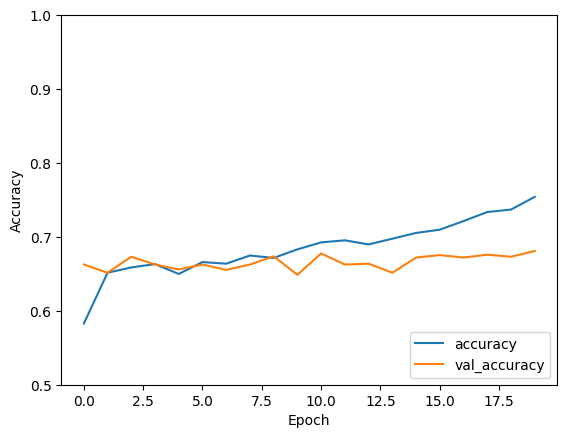

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,t_test, verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,t_test, verbose=2)

57/57 - 0s - 8ms/step - accuracy: 0.6809 - loss: 0.6193


In [ ]:
print("Test accuracy is ",test_acc,end=", ")
print("Test loss is ",test_loss)

Test accuracy is  0.6809101104736328, Test loss is  0.6192792057991028


AlexNet

The Alexnet has eight layers. The model consists of five layers with a combination of max pooling followed by 3 fully connected layers



In [ ]:
from keras.layers import Activation,MaxPool2D, BatchNormalization, Dropout,Conv2D,Flatten,Dense
from keras.models import Sequential


Train and test data

In [ ]:
x_train1,y_train1 = load_Images(folder_path+"/train_another/",227,False)

In [ ]:
x_test1,y_test1 = load_Images(folder_path+"/train_another/",227,False)

In [ ]:
t_trainalex = pd.Series(y_train1,dtype='category')
t_traina = t_trainalex.cat.codes
t_testalex = pd.Series(y_test1,dtype='category')
t_testa = t_testalex.cat.codes

Building AlexNet Model

In [ ]:
modelAlex = Sequential()
# 1st layer (CONV + pool + batchnorm)
modelAlex .add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', input_shape = (227,227,3)))
modelAlex.add(Activation('relu'))
modelAlex.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
modelAlex.add(BatchNormalization())

# 2nd layer (CONV + pool + batchnorm)
modelAlex.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
modelAlex.add(BatchNormalization())

# layer 3 (CONV + batchnorm)
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(BatchNormalization())

# layer 4 (CONV + batchnorm)
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(BatchNormalization())

# layer 5 (CONV + batchnorm)
modelAlex.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelAlex.add(Flatten())
modelAlex.add(Dense(4096)) #input_shape=(32,32,3,)))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
# Add Dropout to prevent overfitting
modelAlex.add(Dropout(0.4))

#2nd Fully Connected Layer
modelAlex.add(Dense(4096))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
#Add Dropout
modelAlex.add(Dropout(0.4))
"""
#3rd Fully Connected Layer
modelAlex.add(Dense(1000))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
#Add Dropout
modelAlex.add(Dropout(0.4))
"""
#Output Layer
modelAlex.add(Dense(2))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('softmax'))

In [ ]:
modelAlex.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │     177,213,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 4096)                │              

 Total params: 197,787,402 (754.50 MB)

 Trainable params: 197,768,774 (754.43 MB)

 Non-trainable params: 18,628 (72.77 KB)

In [ ]:
modelAlex.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [ ]:
history = modelAlex.fit(x_train1,t_traina,batch_size=10,epochs=2,validation_data=(x_test1,t_testa))

Epoch 1/2
181/181 ━━━━━━━━━━━━━━━━━━━━ 1057s 6s/step - accuracy: 0.7685 - loss: 0.5032 - val_accuracy: 0.5117 - val_loss: 2.4360
Epoch 2/2
181/181 ━━━━━━━━━━━━━━━━━━━━ 1058s 6s/step - accuracy: 0.8407 - loss: 0.3870 - val_accuracy: 0.5028 - val_loss: 2.2139


57/57 - 95s - 2s/step - accuracy: 0.5028 - loss: 2.2139


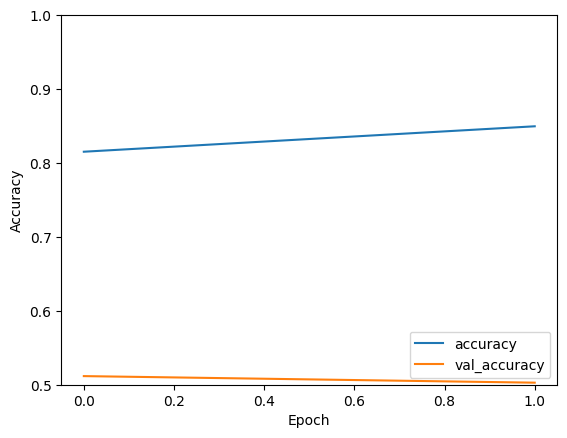

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = modelAlex.evaluate(x_test1,t_testa, verbose=2)

VGG16
The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.

Train and test data



In [ ]:
x_trainvgg,y_trainvgg  = load_Images("/content/train_another/",224,False)

In [ ]:
x_testvgg,y_testvgg = load_Images("/content/test_another/",224,False)

In [ ]:
t_trainvgg = pd.Series(y_trainvgg,dtype='category')
t_trainv = t_trainvgg.cat.codes
t_testvgg = pd.Series(y_testvgg,dtype='category')
t_testv = t_testvgg.cat.codes

In [ ]:
cl = dict(enumerate(t_trainvgg.cat.categories))

In [ ]:
cl

{0: 'damage', 1: 'no_damage'}

Building VGG16 Model



In [ ]:
modelv = Sequential()
modelv.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelv.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
"""
modelv.add(Flatten(name='flatten'))
modelv.add(Dense(256, activation='relu', name='fc1'))
modelv.add(Dense(128, activation='relu', name='fc2'))
modelv.add(Dense(1, activation='sigmoid', name='output'))
"""

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"\nmodelv.add(Flatten(name='flatten'))\nmodelv.add(Dense(256, activation='relu', name='fc1'))\nmodelv.add(Dense(128, activation='relu', name='fc2'))\nmodelv.add(Dense(1, activation='sigmoid', name='output'))\n"

In [ ]:
modelv.add(Flatten())
modelv.add(Dense(units=4096,activation="relu"))
modelv.add(Dense(units=4096,activation="relu"))
modelv.add(Dense(units=2, activation="softmax"))

In [ ]:
modelv.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (MaxPooling2D)                 │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = modelv.fit(x_trainvgg,t_trainv,batch_size=10,epochs=2,validation_data=(x_testvgg,t_testv))

Epoch 1/2
181/181 ━━━━━━━━━━━━━━━━━━━━ 5227s 29s/step - accuracy: 0.4789 - loss: 0.6992 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/2
181/181 ━━━━━━━━━━━━━━━━━━━━ 5313s 29s/step - accuracy: 0.4807 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931


57/57 - 1088s - 19s/step - accuracy: 0.5000 - loss: 0.6931


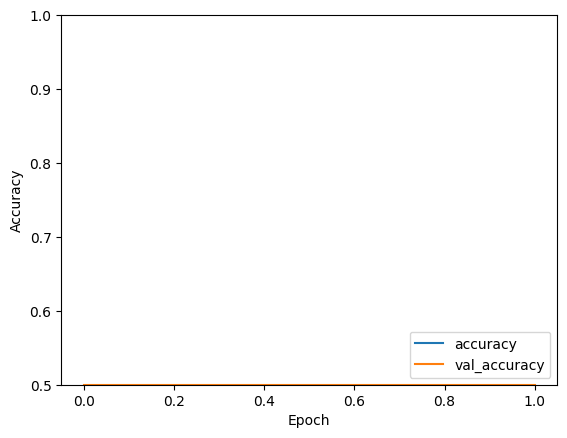

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = modelv.evaluate(x_testvgg,t_testv, verbose=2)


In [ ]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = modelv.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + cl[classification])

97.09643721580505% Confidence no_damage


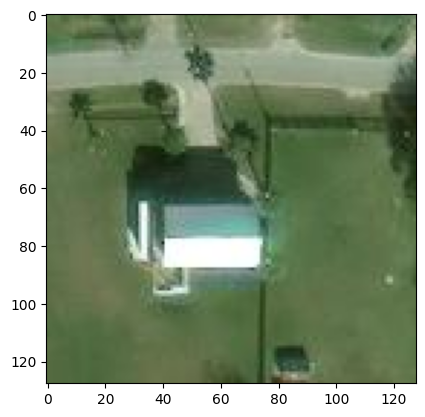

In [ ]:
img = Image.open(r"/content/test_another/no_damage/-95.06604899999999_29.831622999999997.jpeg")
Prediction(img)

87.91155219078064% Confidence no_damage


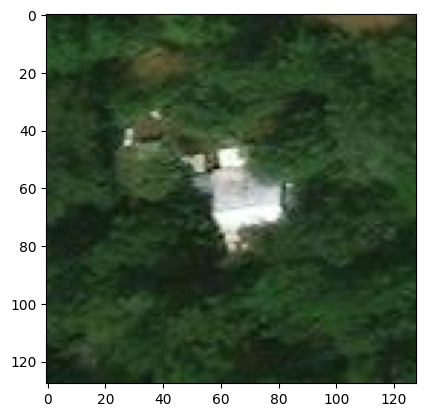

In [ ]:
img = Image.open(r"/content/train_another/damage/-93.597636_30.674362.jpeg")
Prediction(img)

LeNet-5

Test accuracy: 0.6704

Test loss: 0.60

AlexNet

Test accuracy: 0.7536

Test loss: 0.6264

VGG16

Test accuracy: 0.5000

Test loss: 0.6931